# Shopper Clustering and Purchase Prediction Project
Data: https://www.kaggle.com/roshansharma/online-shoppers-intention

**Objective:** There is a two-fold objective with this project. 
1. To cluster shoppers based on key features using K-Means 
2. To build a predictive model to determine if a shopper will be a purchaser

**Purpose:** To practice clustering in order to use it as a feature engineering technique for future projects. Additionally, I will continue refining my predictive model building skillset. 

**Business Case:** See the last portion of this notebook for an in-depth business case for building a predictive model using this data.

In [1]:
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
# check general information about data
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [4]:
# check data types and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

The first 8 items in the data set contain nulls. Possible some data was collected before this info was available?

## Imputing the Missing Vals

In [5]:
# using 0 to mark them as "blank"
df.fillna(0, inplace = True)

# there are also some -1 values
# replace them with 0 as well
df.replace(-1, 0, inplace = True)

## Distributions

#### Yes/No Plots

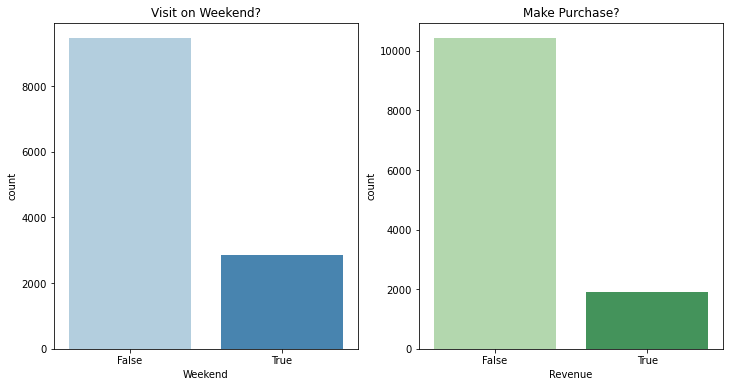

In [6]:
f, axes = plt.subplots(ncols=2,figsize=(12,6))

sns.countplot(df['Weekend'], palette='Blues', ax=axes[0])
axes[0].set_title('Visit on Weekend?')
sns.countplot(df['Revenue'], palette='Greens', ax=axes[1])
axes[1].set_title('Make Purchase?')

plt.show()

Later we will use Revenue as the target variable in our prediction analysis. Here we see that it is imbalanced and may need to be re-sampled for a better predictive performance by our model(s).

#### Categorical Plots

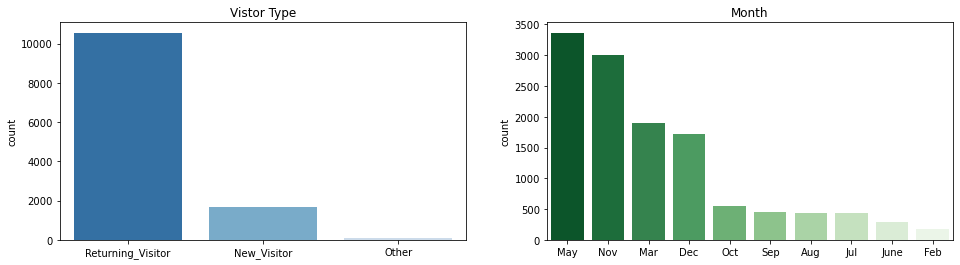

In [7]:
f, axes = plt.subplots(ncols=2,figsize=(16,4))

sns.countplot(df['VisitorType'], palette='Blues_r', ax=axes[0])
axes[0].set_title('Vistor Type')
axes[0].set_xlabel(None)
sns.countplot(df['Month'], palette='Greens_r', ax=axes[1], order=df['Month'].value_counts().index)
axes[1].set_title('Month')
axes[1].set_xlabel(None)
plt.show()

#### Technological Demographics

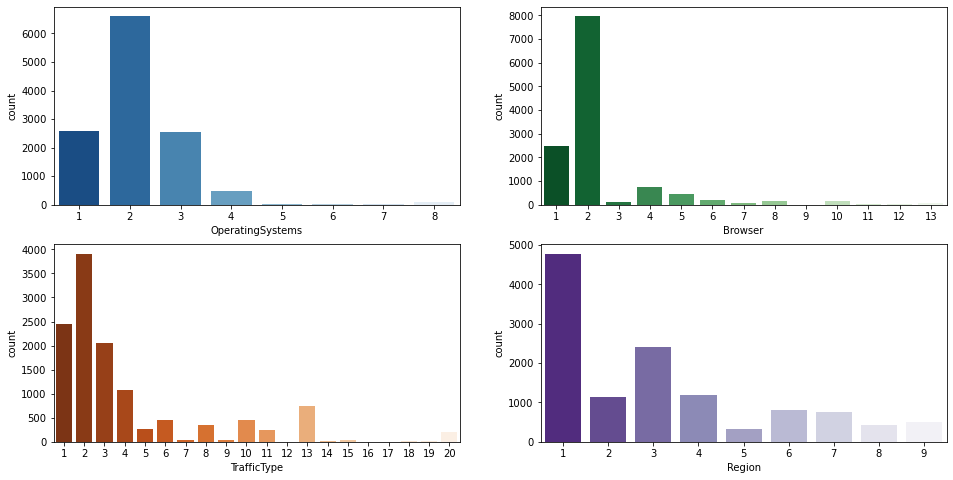

In [8]:
f, axes = plt.subplots(2,2,figsize=(16,8))

sns.countplot(df['OperatingSystems'], palette='Blues_r', ax=axes[0,0])
sns.countplot(df['Browser'], palette='Greens_r', ax=axes[0,1])
sns.countplot(df['TrafficType'], palette='Oranges_r', ax=axes[1,0])
sns.countplot(df['Region'], palette='Purples_r', ax=axes[1,1])


plt.show()

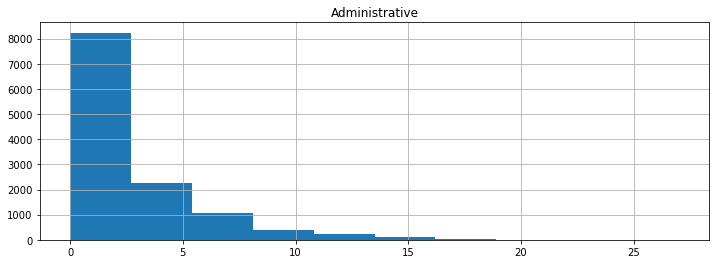

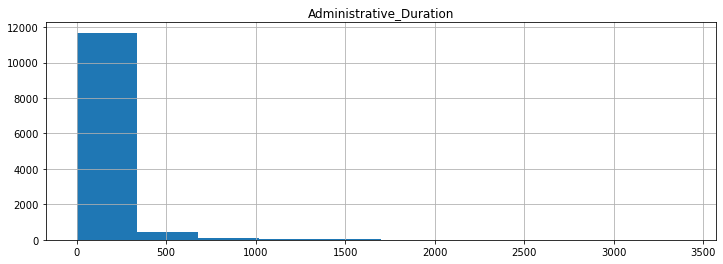

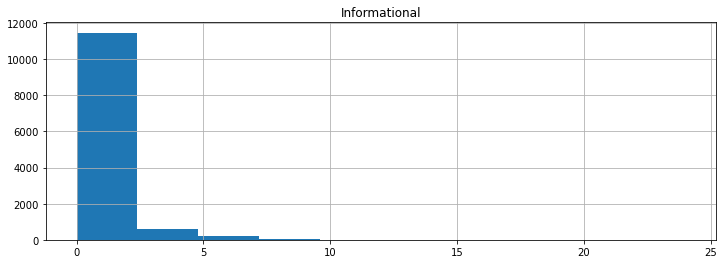

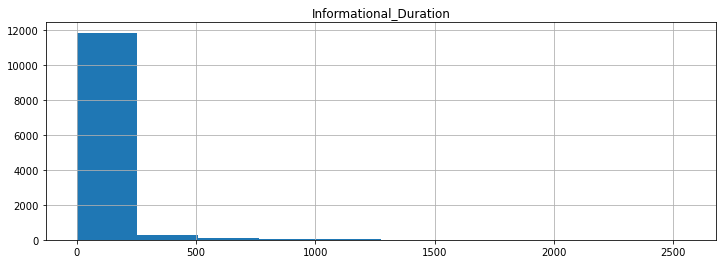

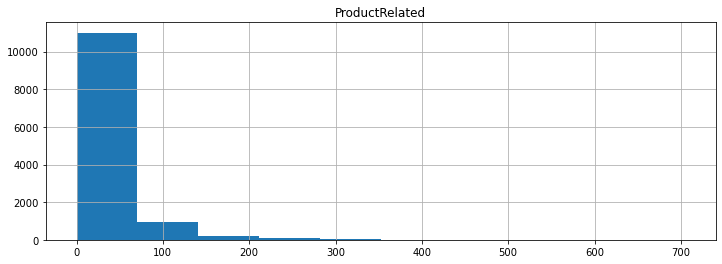

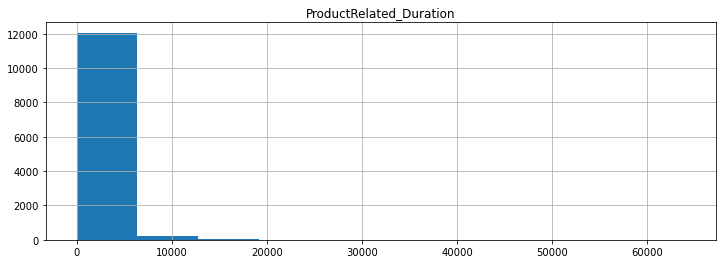

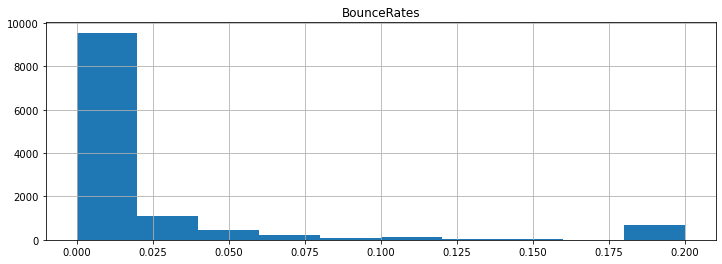

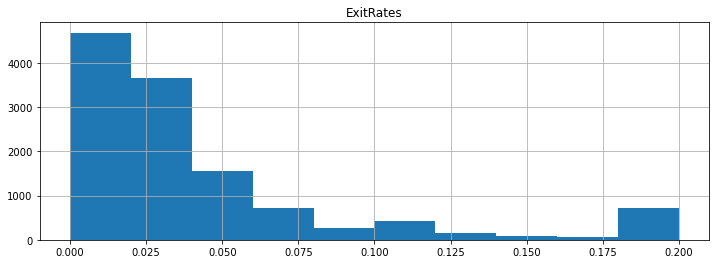

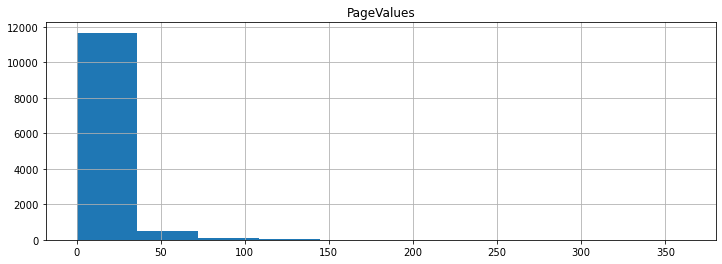

In [9]:
features = ['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 
            'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates','PageValues']

for feat in features:
        plt.figure(figsize=(12,4))
        df[feat].hist()
        plt.title(feat)

We can see from these plots that many of the distributions are positively-skewed with long tails. A linear model like Logistic Regression may not be the best option if we want to predict off of this data.

## Feature Engineering

In [10]:
# create a feature for total duration on site
df['Total_Duration'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']

# create a feature for total page visits
df['Total_Visits'] = df['Administrative'] + df['Informational'] + df['ProductRelated']

## Cluster Analysis

In the analysis below, I will perform K-Means clustering on various groupings of data. The intention here is to uncover customer groups that could potentially used for future predictive analytics. I will not be using them for prediction purposes here since I am using the data to create the clusters. 

### Define Elbow Method and Plot Functions

In [11]:
from sklearn.cluster import KMeans

In [12]:
def plotElbow(df, input1, input2, k=10):
    
    x = df[[input1, input2]].values
    wcss = []
    
    for i in range(1, k+1):
        km = KMeans(n_clusters = i,
                  init = 'k-means++',
                  max_iter = 300,
                  n_init = 10,
                  random_state = 42)
        km.fit(x)
        labels = km.labels_
        wcss.append(km.inertia_)

    plt.figure(figsize=(12,4))
    plt.plot(range(1, k+1), wcss)
    plt.grid()
    plt.tight_layout()
    plt.title('Elbow Method Plot', fontsize = 16)
    plt.xlabel('# of Clusters')
    plt.ylabel('wcss')
    plt.show()

In [13]:
def plotKMeans(k, df, input1, input2, labels=[], colors=[]):

    x = df[[input1, input2]].values
    
    # set colors
    if len(colors) < 1:
        colors = ['pink','c','cyan','yellow','y','k']
    
    # default counter for labels
    n = 1
    while len(labels) < k:
        labels.append(n)
        n += 1

    km = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    y_means = km.fit_predict(x)

    plt.figure(figsize=(12,6))

    for i in range(0,k):
        plt.scatter(x[y_means == i, 0], x[y_means == i, 1], s = 100, c = colors[i], label = labels[i])
        
    plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 75, c = 'blue' , label = 'centeroid', marker='D')

    plt.title(input1 + ' vs ' + input2, fontsize = 16)
    plt.grid()
    plt.xlabel(input1)
    plt.ylabel(input2)
    plt.legend()
    plt.show()

### Administrative Duration

First, we will look at customers based on how they are spending their time on the website in relation to the bounce rate (percent of users that navigate away from the site after viewing one page).

To do this, we need to find the optimal number of clusters to create. We will use the "elbow" method to find k for each type of website the user can interact with.

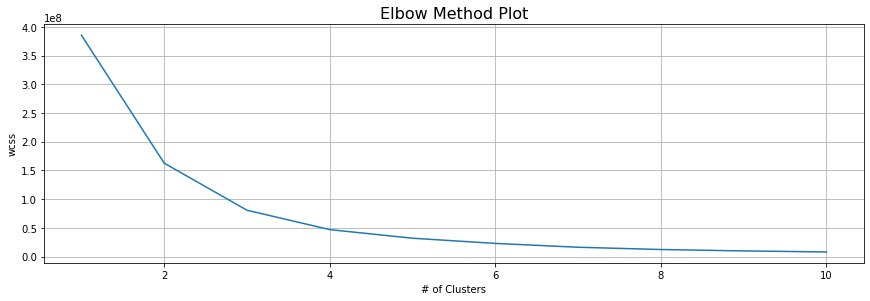

In [14]:
plotElbow(df, 'Administrative_Duration', 'BounceRates')

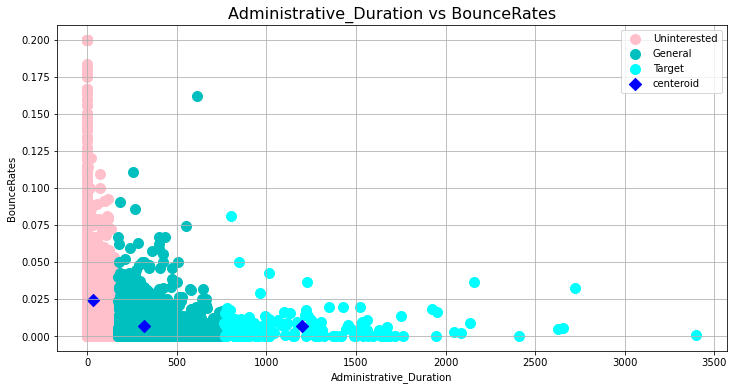

In [15]:
plotKMeans(3, df, 'Administrative_Duration', 'BounceRates', ['Uninterested','General','Target'])

After graphing without labels, I segmented the shoppers into three groups: uninterested, general, and target customers.
Defined loosely as:
- Uninterested Customers: high bounce rates and low page duration
- General Customers: moderate bounce rates and moderate page duration
- Target Customers: low bounce rates and high page duration

### Informational Duration

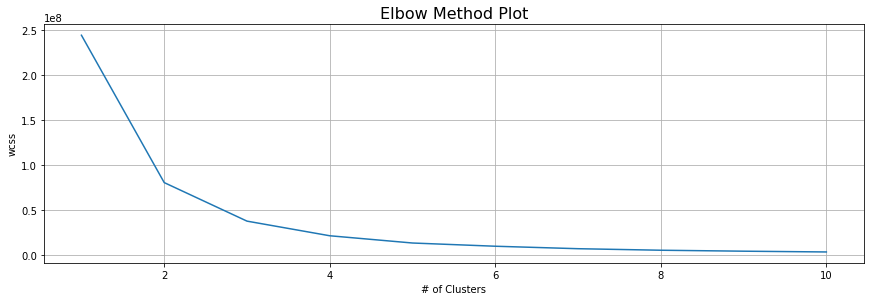

In [16]:
plotElbow(df, 'Informational_Duration', 'BounceRates')

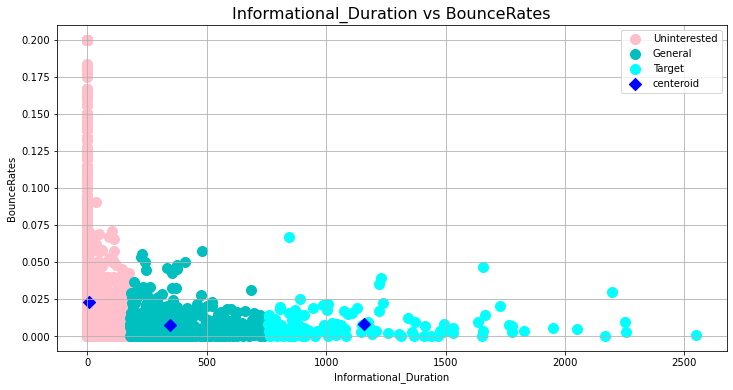

In [17]:
plotKMeans(3, df, 'Informational_Duration', 'BounceRates', ['Uninterested','General', 'Target'], ['pink','c', 'cyan'])

### Product Related Duration

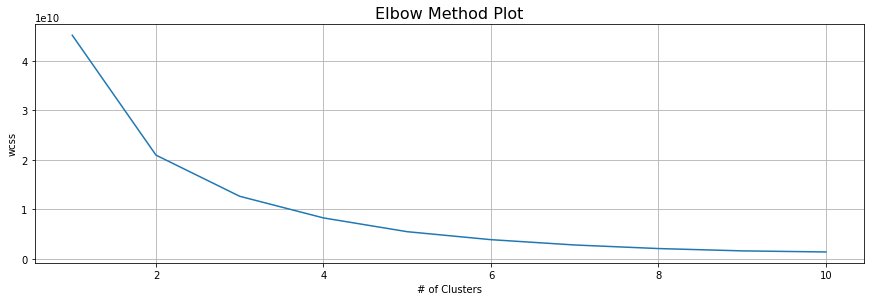

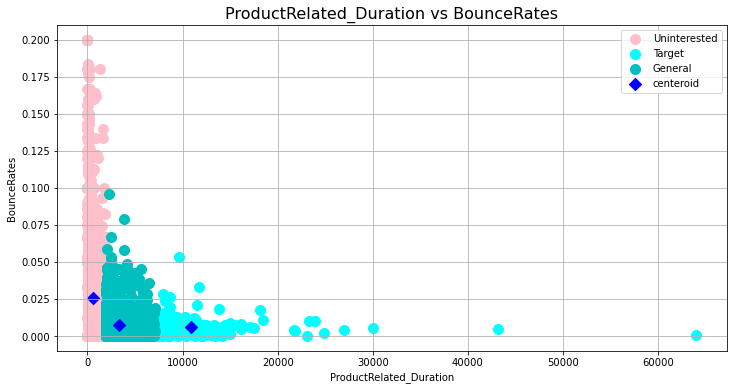

In [18]:
plotElbow(df, 'ProductRelated_Duration', 'BounceRates')
plotKMeans(3, df, 'ProductRelated_Duration', 'BounceRates', ['Uninterested','Target', 'General'], ['pink','cyan', 'c'])

### Total Duration

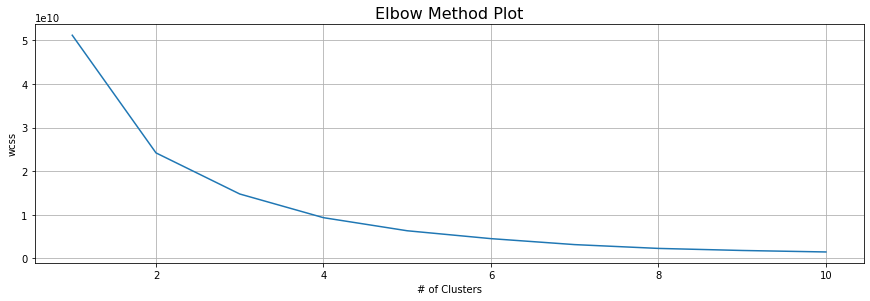

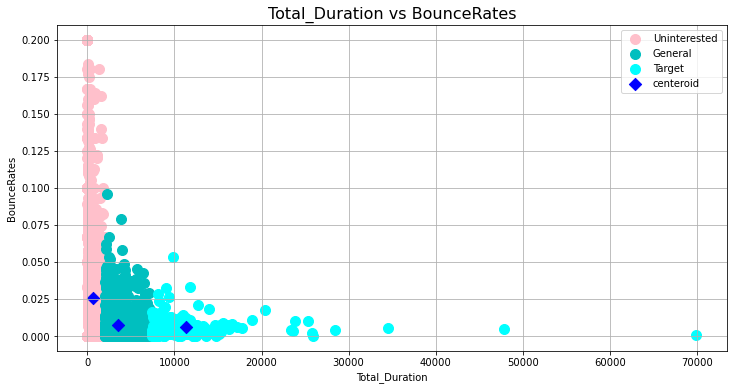

In [19]:
plotElbow(df, 'Total_Duration', 'BounceRates')
plotKMeans(3, df, 'Total_Duration', 'BounceRates', ['Uninterested','General','Target'],['pink','c','cyan'])

### Region and Traffic

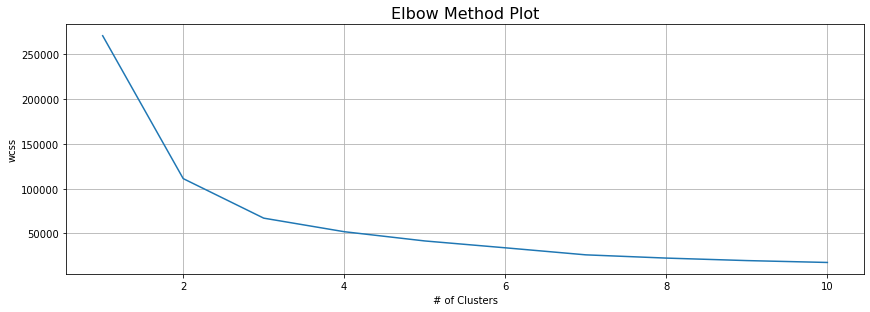

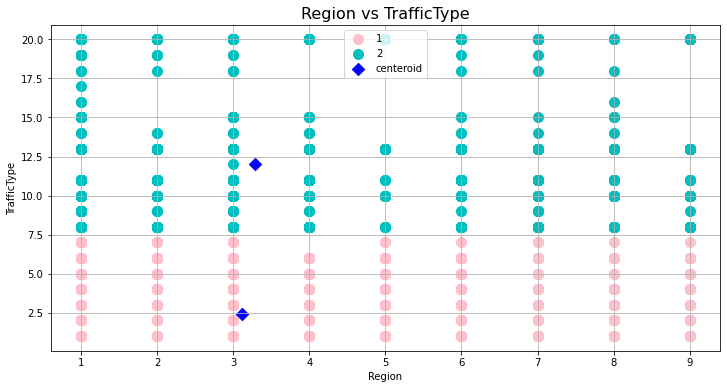

In [20]:
plotElbow(df, 'Region', 'TrafficType')
plotKMeans(2, df, 'Region', 'TrafficType')

Due to limited information about the data, I do not know what the values for TrafficType or Region represent. However, the clustering analysis shows thta we form 2 distinct groups seperated by TrafficType around the value 7.5. If this was a data set from a company, I would collaborate with other teams/departments to understand what these encodings mean to better understand how they represent a e-commerce shopper. It's entirely possible--and highly likely--that the values are simply categorical. If this is the case, the KMeans analysis should be discarded.

### Region vs Total Duration

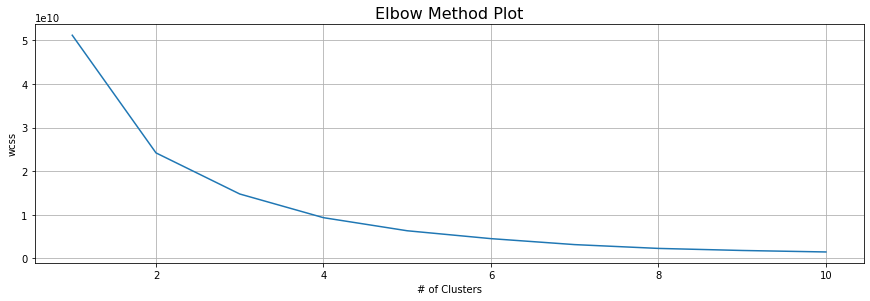

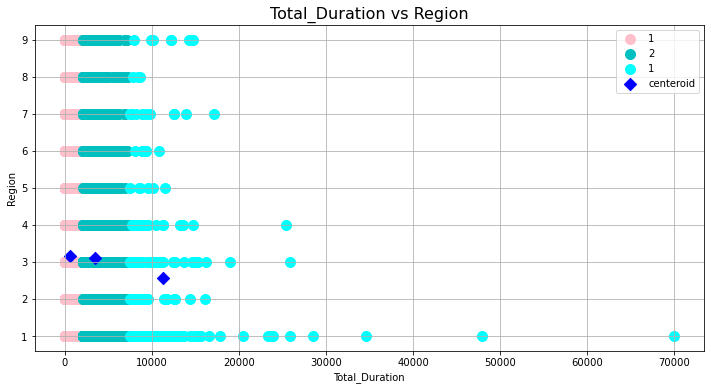

In [21]:
plotElbow(df, 'Total_Duration', 'Region')
plotKMeans(3, df, 'Total_Duration', 'Region')

There doesn't seem to be any distinction between the regions with only three clusters. The primary dividing feature of the customers is their Total Duration. This suggests to us that where the customer is located doesn't play a role in how long they visit the site.

# PCA for Prediction

In this section I am going to explore the effects of applying PCA to the data set. In order to do this, I have to label encode or one-hot encode some of the data and then standardize the values. We will also now declare a target variable which in this case will be the binary "Revenue". We will be predicting "Yes" or "No" -- or rather 1 or 0.

In [22]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, Binarizer
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [23]:
df_PCA = df.copy()
df_PCA.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'Total_Duration', 'Total_Visits'],
      dtype='object')

In [24]:
# get dummies for categorical features and label encode binary features

cat_features = ['Month', 'VisitorType']
bin_features = ['Weekend', 'Revenue']

df_PCA = df_PCA.join(pd.get_dummies(df_PCA[cat_features]))
df_PCA.drop(cat_features,1,inplace=True)

le = LabelEncoder()
for el in bin_features:
    df_PCA[el] = le.fit_transform(df_PCA[el])
    
# binarize the target
df_PCA['Revenue'] = Binarizer().fit_transform(df_PCA['Revenue'].values.reshape(-1,1))

In [25]:
# standardize the non-categorical numerical inputs

features = ['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 'ProductRelated', 
            'ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues', 'Total_Duration', 'Total_Visits']

for feat in features:
    df_PCA[feat] = StandardScaler().fit_transform(df_PCA[feat].values.reshape(-1,1))

In [26]:
# Split data to X and y and then tran and test sets

X = df_PCA.drop('Revenue',1)
y = df_PCA['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [27]:
# PCA projection down to explain 95% of variance

pca = PCA(0.95, svd_solver='full')
pc_train = pca.fit_transform(X_train)
pc_test = pca.transform(X_test)

## Logistic Regression

In [28]:
# use PCA transformed data for logistic regression
lr = LogisticRegression(random_state=42)

lr.fit(pc_train, y_train)

preds_lr = lr.predict(pc_test)
probs_lr = lr.predict_proba(pc_test)

## Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [30]:
rf = RandomForestClassifier(random_state=42)
params = {
    'n_estimators': range(50,250,10),
    'max_depth': range(1, 11, 1),
    'min_samples_split': range(2,11,2),
    'min_samples_leaf': range(2,11,2),
    'max_features': ['sqrt', 'log2']
    }

In [31]:
# perform a randomized search to find the optimal 
# hyper parameters for our random forest model

rs = RandomizedSearchCV(rf, params, scoring='f1', cv=5, random_state=42)
rs.fit(X_train, y_train) # use regular data (not PCA transformed)

rf = rs.best_estimator_
rs.best_score_

0.6207721033656528

In [32]:
preds_rf = rf.predict(X_test)
probs_rf = rf.predict_proba(X_test)

## Measuring Performance

In [33]:
from sklearn.metrics import auc, confusion_matrix, precision_score, recall_score, f1_score, roc_curve

In [34]:
lr_accuracy = lr.score(pc_test, y_test)
lr_precision = precision_score(y_test, preds_lr)
lr_recall = recall_score(y_test, preds_lr)
lr_f1 = f1_score(y_test, preds_lr)

rf_accuracy = rf.score(X_test, y_test)
rf_precision = precision_score(y_test, preds_rf)
rf_recall = recall_score(y_test, preds_rf)
rf_f1 = f1_score(y_test, preds_rf)

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, probs_lr[:,1])
lr_auc_score = auc(fpr, tpr)

fpr, tpr, thresholds = roc_curve(y_test, probs_rf[:,1])
rf_auc_score = auc(fpr, tpr)

In [36]:
results = pd.DataFrame([[lr_accuracy, lr_precision, lr_recall, lr_f1, lr_auc_score],
                       [rf_accuracy, rf_precision, rf_recall, rf_f1, rf_auc_score]], index=['LR Model', 'RF Model'], columns=['Accuracy','Precision','Recall','F1','AUC'])
results.T

,LR Model,RF Model
Accuracy,0.876419,0.897178
Precision,0.747706,0.759036
Recall,0.333333,0.515337
F1,0.461103,0.613886
AUC,0.884788,0.925541


In [37]:
print('LR conf matrix:')
print(confusion_matrix(y_test, preds_lr))
print('\n')
print('RF conf matrix:')
print(confusion_matrix(y_test, preds_rf))

LR conf matrix:
[[2539   55]
 [ 326  163]]


RF conf matrix:
[[2514   80]
 [ 237  252]]


In [38]:
# what if we predicted yes or no every time?
yes_accuracy = y_test.sum()/len(y_test)

print("Accuracy of 'Yes' prediciton every time:", yes_accuracy)
print("Accuracy of 'No' prediciton every time:", (1-yes_accuracy))

Accuracy of 'Yes' prediciton every time: 0.1586117418099254
Accuracy of 'No' prediciton every time: 0.8413882581900746


**Performance Comparison**\
If a model simply predicted no reveune for every user, it would be correct 84% of the time. Here we see our logistic regression model slightly outperforms this "baseline" by approximately 4 ppt and the random forest model further outperforms the logistic regression model by about 2 ppt.

The random forest model also outperforms the logistic regression model in precision and recall which I believe are important metrics for this dataset due to its imbalance.

**Best Model:** Random Forest

## Hypothetical Business Case

Let's theorize a business case for this model.

### Scenario
Our marketing team has discovered that through targeted advertising efforts they can increase consumer spend (increase revenue from e-commerce shoppers that make a purchase). They want to leverage this information to increase company profits. They have a marketing strategy in mind (explained below). Executive management asked if we could build a model that could more effectively target consumers so that our marketing dollars are being used more efficiently. Does our random forest model satisfy this request?

### Current Strategy
Today, the marketing team's strategy is to spend money developing targeted ads for every shopper, regardless of if they convert or not. This strategy is based on the "Yes" only prediction model (accuracy = 0.16, precision = 0.16). This means the team successfully upsells every purchaser, however, only 16% of the shoppers are purchasers. Therefore, 84% of the marketing budget is spent on shoppers who will not purchase. 

### New Strategy
With our trained random forest model, our new strategy will be to market only to predicted purchasers. Our model has shown to predict about 11% of shoppers as purchasers. Of those 11%, the model correctly classified 76% of them as purchasers (this is the precision of the model).

### Metrics and Figures
- Ad price per consumer: \$5 
- Shopper Base: 10,000 shoppers
- Spend per Shopper: \$25
- Incremental Spend from Targeted Ads: \$10
- Baseline Strategy Market Size: 100%
- Baseline Strategy Market Size: 11%
- Baseline Model Precision: 0.16
- Logistic Reg. Model Precision: 0.76

### Results
With our prediction model, we can focus our spend more accurately on purchasers than if we marketed to everyone. By reducing the size of our marketing audience, we can greatly reduce marketing spend. With the current costs of marketing and potential incremental spend, we can realize a profit from our model's performance. Therefore, we can assist our marketing team by identifying which shoppers they should market to. This results in efficient spending and helps turn their findings (targeted ads increase purchaser spend) into a profit growth opportunity. 

**Current Strategy**
- Spend = 5 dollars \* 10,000 shoppers = 50,000 dollars
- Revenue Lift = 10,000 shoppers \* 16% purchasers \* 10 dollars = 16,000 dollars
- Profit = 16,000 - 50,000 = -34,000 dollars **(loss)**

**New Strategy**
- Spend = 5 dollars \* 10,000 shoppers \* 11% = 5,500 dollars
- Reveune Lift = 11% \* 10,000 * 76% \* 10 = 8,360 dollars
- Profit = 8,360 - 5,500 = 2,860 dollars **(profit)**

### Recommendations

It is recommended that the marketing team pursue targeted ads using the new strategy of only marketing to shoppers based on the results of the random forest model. In comparison to the marketing team's strategy, the random forest model will actually generate a profit. The increase in profits from utilizing the random forest model is 2,860 dollars. 

### Future Considerations
Can we do better? If the model performed perfectly (100% True Positive Rate with 0% False Positives), the largest profit that could be realized is 8,000 dollars. Therefore, our model was able to realize about 36% of the potential profits from targeted ads. If the model can be further fine-tuned then even greater profits could be realized. 